In [1]:
import ProductReviewScraper.amazon_review_database as db
from ProductReviewScraper.models import Review, Product
import pandas as pd
from pathlib import Path


In [2]:
df = pd.read_sql(
    db.session.query(
        Product, Review).filter(Review.product_id == Product.id, Product.asin == 'B000X457HO').statement,
    con=db.engine
)

df.drop(['id', 'id_1', 'product_id'],
        axis='columns', inplace=True)
df.columns = ['product_asin', 'product_name',  'product_imageurl',
              'product_price', 'product_global_rating', 'review_amazonid',
              'review_user', 'review_rating', 'review_title',
              'review_date', 'review_verified', 'review_foreign',
              'review_content', 'review_helpful_vote']

product_list = df['product_asin'].unique()


English only reviews

In [3]:
df = df[df["review_foreign"] == False].copy()
df.drop(["review_foreign"],
        axis='columns', inplace=True)

Clean unicode texts

In [4]:
import unidecode
df["review_content"] = df["review_content"].apply(unidecode.unidecode)
df["review_title"] = df["review_title"].apply(unidecode.unidecode)
df["product_name"] = df["product_name"].apply(unidecode.unidecode)

In [6]:
#Last 4 years

In [10]:
df['review_date'] = pd.to_datetime(df['review_date'])
df4years = df[df['review_date'] >= "2018-1-1"]
df_count = df4years.groupby(pd.Grouper(key='review_date', freq='W')).count()
df_mean = df4years.groupby(pd.Grouper(key='review_date', freq='W')).mean()
weekly_reviews = pd.DataFrame(
    {'Date': df_mean.index, 'Mean': df_mean.review_rating, 'AveragedMean': df_mean.review_rating.rolling(4, center=True).mean(), 'Count': df_count.review_rating, 'AveragedCount': df_count.review_rating.rolling(4, center=True).mean()})
weekly_reviews.to_csv()

In [8]:
len(df4years)


3147

In [30]:

df_count = df4years.groupby(pd.Grouper(key='review_date', freq='W')).count()
df_mean = df4years.groupby(pd.Grouper(key='review_date', freq='W')).mean()
weekly_reviews = pd.DataFrame(
    {'Date': df_mean.index, 'Mean': df_mean.review_rating, 'AveragedMean': df_mean.review_rating.rolling(4, center=True).mean(), 'Count': df_count.review_rating, 'AveragedCount': df_count.review_rating.rolling(4, center=True).mean()})


In [31]:
weekly_reviews

,Date,Mean,AveragedMean,Count,AveragedCount
review_date,,,,,
2018-01-07,2018-01-07,3.666667,NaN,6,NaN
2018-01-14,2018-01-14,4.416667,NaN,12,NaN
2018-01-21,2018-01-21,4.857143,4.406994,7,10.25
2018-01-28,2018-01-28,4.687500,4.432635,16,12.00
2018-02-04,2018-02-04,3.769231,4.132040,13,12.50
...,...,...,...,...,...
2022-01-23,2022-01-23,4.000000,3.789881,8,17.25
2022-01-30,2022-01-30,3.350000,3.704167,20,15.75
2022-02-06,2022-02-06,3.466667,3.759722,15,13.00


In [19]:
import seaborn as sns

<AxesSubplot:xlabel='Date', ylabel='Count'>

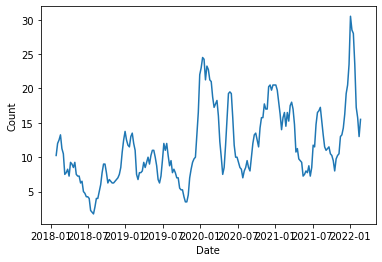

In [26]:
sns.lineplot(x=weekly_reviews["Date"],
             y=weekly_reviews["Count"].rolling(window=4).mean())
